In [2]:
import matplotlib
import skimage
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline


/home/crimzoid/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [1]:
# %%bash
# git init
# git config --global user.name i008
# git config --global user.email kubacieslik@gmail.com

Reinitialized existing Git repository in /home/crimzoid/googledrive/Projects/pyimagegurus/.git/


In [1]:
# !git add . 
# !git commit -a -m "init"
# !git remote add origin ssh://github.com/i008/pyimagegurus.git
# !git push origin master 

## 1.1

In [15]:
%%writefile load_display_save.py

import argparse
import cv2
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help='Path to the image')
args = vars(ap.parse_args())
image = cv2.imread(args['image'])
print "width: %d pixels" %(image.shape[1])
print "height: %d pixels" %(image.shape[0])
print "channels: %d" %(image.shape[2])

cv2.imshow("Image", image)
cv2.waitKey(0)

# cv2.imwrite('data/new.jpg', image)




Overwriting load_display_save.py


In [12]:
%%bash

python load_display_save.py -i "data/florida_trip.png"

width: 600 pixels
height: 450 pixels
channels: 3


In [16]:
%%bash

python load_display_save.py -i "data/grand_canyon.png"

width: 600 pixels
height: 399 pixels
channels: 3


### QUIZ 1.1

In [4]:
gir = cv2.imread('data/giraffe.png')
gir.shape

(300, 400, 3)

## ------

## 1.2

Black:  (0, 0, 0)  
White:  (255, 255, 255)  
Red:  (255, 0, 0)  
Green:  (0, 255, 0)  
Blue:  (0, 0, 255)  
Aqua:  (0, 255, 255)  
Fuchsia:  (255, 0, 255)  
Maroon:  (128, 0, 0)  
Navy:  (0, 0, 128)  
Olive:  (128, 128, 0)  
Purple:  (128, 0, 128)  
Teal:  (0, 128, 128)  
Yellow:  (255, 255, 0)  

In [3]:
%%HTML
<img src='https://gurus.pyimagesearch.com/wp-content/uploads/2015/03/image_grid.png'>

In [42]:
%%writefile getting_and_setting.py
import argparse
import cv2

ap = argparse.ArgumentParser()
ap.add_argument('-i','--image',required=True, help='Path to image')
ap.add_argument('-d','--display', required=False)
args = vars(ap.parse_args())

image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
if args['display']:
    cv2.imshow("Original", image)
    cv2.waitKey(0)

(b, g, r) = image[0, 0]
print "Pixel at (0,0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b)

#setting pixel value to RED
image[0,0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print "Pixel at (0,0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b)


#center of the image
(cX, cY) = (w/2, h/2)
tl = image[0:cY, 0:cX]
tr = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
tl_green = image[0:cY, 0:cX] = (0, 255, 0)


# cv2.imshow("",tr)
# cv2.waitKey()
# cv2.imshow("",bl)
# cv2.waitKey()
# cv2.imshow("",tl_green)
# cv2.waitKey()
# cv2.imshow("top left", tl)
# cv2.waitKey()


Overwriting getting_and_setting.py


In [43]:
%%bash
python getting_and_setting.py -i 'data/florida_trip.png' 


Pixel at (0,0) - Red: 233, Green: 240, Blue: 246
Pixel at (0,0) - Red: 255, Green: 0, Blue: 0


## /\/\/\/\/\/\

## 1.3) DRAWING 



In [28]:
canvas = np.zeros((300, 300, 3), dtype="uint8")
# rows / columns / channels
# uint8 = 8bits depth

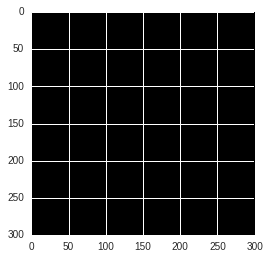

In [7]:
plt.imshow(canvas)

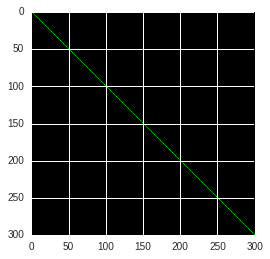

In [29]:
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt.imshow(canvas)

In [30]:
red = (0, 255, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)

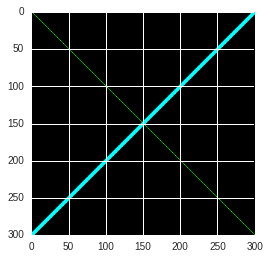

In [18]:
plt.imshow(canvas)

In [31]:
cv2.rectangle(canvas, (10, 10), (60, 60), green)
blue = (255, 0, 0)
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)

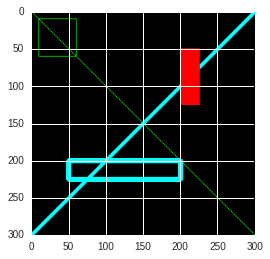

In [32]:
plt.imshow(canvas)

#### CIRCLES

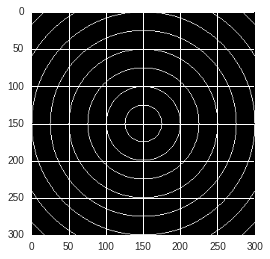

In [37]:
cangen = lambda: np.zeros((300, 300, 3), dtype='uint8')
canvas = cangen()

# center of canvas
(centerX, centerY) = (canvas.shape[1] / 2, canvas.shape[0] / 2)

white = (255, 255, 255)
for r in xrange(0, 300, 25):
    cv2.circle(canvas, (centerX, centerY), r, white)

plt.imshow(canvas)



